# Intro to Numpy

Today

* IPython Slides

* Numpy!

* Vectorized numerical code

IPython Slides!!!

* `ipython nbconvert --to slides numpy.ipynb`

* Consider following along in the notebook so you can mess around with the code.

# Numpy

* Much of artificial intelligence amounts to working with points in $\mathbb{R}^n$ (points in $n$-dimensional space).

    * We need fast, convenient ways to work with $\mathbb{R}^n$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


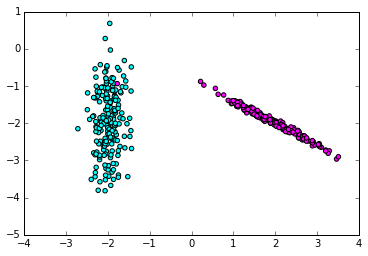

In [2]:
from sklearn import datasets, neighbors
(easy_x, easy_y) = datasets.make_classification(n_samples=400, n_features = 2, n_informative = 2,
                             n_redundant = 0, n_repeated = 0, n_clusters_per_class=1, class_sep=2)
scatter(easy_x[:,0], easy_x[:,1], c = easy_y, cmap = 'cool')

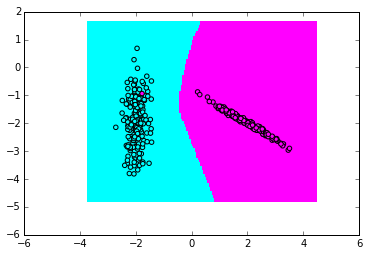

In [3]:
# these two lines create a classifier and train the classifier.
n_neighbors = 10
nn_classifier = neighbors.KNeighborsClassifier(n_neighbors, 'distance')
nn_classifier.fit(easy_x, easy_y)

# These seven lines show how points in a grid would be classified
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = nn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='cool')

# this line plots the training data
scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='cool')

How do we work with $\mathbb{R}^n$?

* We need *fast* $n$-dimensional vectors.

* We need *fast* $n \times m$ matrices.

* We need fast methods for doing I/O with vectors and matrices.

Numpy provides these three things, and more!

In [4]:
# What wrong with this code?
v1 = range(10000)
v2 = range(10000, 20001)
v3 = []

for x,y in zip(v1,v2):
    v3.append(x+y)
    
print len(v3), v3[0:5]

10000 [10000, 10002, 10004, 10006, 10008]


What's in numpy?

* A type for multidimensional arrays (`ndarray`)

* Fast operations on `ndarray`s

    * Implemented in C and/or Fortran for efficiency
    
* Code is easily "vectorized."
   
    * Functions operating on entire `ndarray`s.

# Importing numpy

In [5]:
import numpy as np

In [6]:
# Is this code better?
v1 = np.arange(10000)
v2 = np.arange(10000, 20000)
v3 = v1 + v2
print len(v3), v3[0:5]

10000 [10000 10002 10004 10006 10008]


We can convert array objects to numpy arrays

In [7]:
x = [1,2,3,4,5]
type(x)

list

In [9]:
npx = np.asarray(x)
type(npx)

numpy.ndarray

We can create ranges, as in regular Python

In [10]:
xs = np.arange(0, 100, 2)
xs[0:10]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [11]:
xs[-6:]

array([88, 90, 92, 94, 96, 98])

In [12]:
# Potentially problematic...
ys = np.arange(0.0, 1, 0.1)
ys

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

What's wrong with the above?

* Hint - do we always know how many elements we'll get back?

* Can we easily ensure that we'll always get the endpoints?

In [13]:
# Use linspace instead to specify a number of elements:
ys = np.linspace(0, 1, 10)
ys

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

There's also a `logspace`, which does what you would expect...

# Random Data

If I told you I was giving you random data, how could you check?

(array([  999.,  1021.,  1026.,   983.,   985.,   992.,  1024.,   985.,
         1014.,   971.]),
 array([  1.87440461e-05,   1.00016658e-01,   2.00014572e-01,
          3.00012486e-01,   4.00010400e-01,   5.00008314e-01,
          6.00006228e-01,   7.00004142e-01,   8.00002056e-01,
          8.99999970e-01,   9.99997884e-01]),
 <a list of 10 Patch objects>)

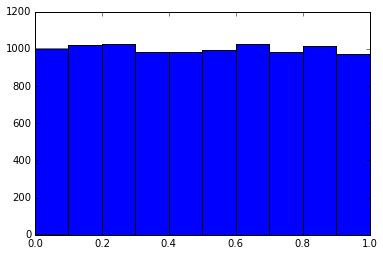

In [14]:
# uniformly random data
unifs = np.random.rand(10000)
hist(unifs)

(array([   19.,   151.,   656.,  1684.,  2744.,  2570.,  1519.,   524.,
          118.,    15.]),
 array([-3.54610673, -2.82515736, -2.10420799, -1.38325862, -0.66230925,
         0.05864012,  0.77958949,  1.50053886,  2.22148823,  2.9424376 ,
         3.66338696]),
 <a list of 10 Patch objects>)

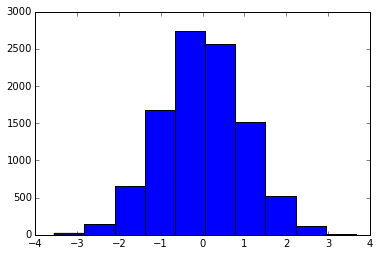

In [15]:
nunif = np.random.randn(10000)
hist(nunif)

# "Default" Arrays

In [16]:
zero_vector = np.zeros(5)
print zero_vector

print

# note the extra parens!!!
zero_matrix = np.zeros((5,5))
print zero_matrix

[ 0.  0.  0.  0.  0.]

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [17]:
ones_vector = np.ones(5)
print ones_vector

print 

ones_tensor = np.ones((3,2,2))
print ones_tensor

[ 1.  1.  1.  1.  1.]

[[[ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]]]


# Numpy arrays have a few important properties

In [18]:
# what does this imply about the nature of ndarrays?
print "element type, aka dtype: ", zero_matrix.dtype
print
print "number of dimensions: ", zero_matrix.ndim
print
print "vector shape: ", xs.shape
print "array shape: ", zero_matrix.shape
print
print "bytes per element: ", zero_matrix.itemsize
print
print "total bytes: ", zero_matrix.nbytes


element type, aka dtype:  float64

number of dimensions:  2

vector shape:  (50,)
array shape:  (5, 5)

bytes per element:  8

total bytes:  200


# Indexing

In [19]:
# individual element access
zero_matrix[2,2] = 42
zero_matrix[1,2] = 13
print zero_matrix
print 
ones_tensor[1,1,1] = 5
print ones_tensor

[[  0.   0.   0.   0.   0.]
 [  0.   0.  13.   0.   0.]
 [  0.   0.  42.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]

[[[ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  5.]]

 [[ 1.  1.]
  [ 1.  1.]]]


In [20]:
# column access
print zero_matrix[:, 2]

# row access
print zero_matrix[1, :]

# we can modify rows and columns too
zero_matrix[:, 0] = 4
print
print zero_matrix

[  0.  13.  42.   0.   0.]
[  0.   0.  13.   0.   0.]

[[  4.   0.   0.   0.   0.]
 [  4.   0.  13.   0.   0.]
 [  4.   0.  42.   0.   0.]
 [  4.   0.   0.   0.   0.]
 [  4.   0.   0.   0.   0.]]


# Arithmetic

* We should try to avoid doing things element by element

* Numpy makes this pretty easy

In [21]:
zero_matrix + zero_matrix

array([[  8.,   0.,   0.,   0.,   0.],
       [  8.,   0.,  26.,   0.,   0.],
       [  8.,   0.,  84.,   0.,   0.],
       [  8.,   0.,   0.,   0.,   0.],
       [  8.,   0.,   0.,   0.,   0.]])

In [22]:
ones_vector + ones_vector

array([ 2.,  2.,  2.,  2.,  2.])

What should happen if the arguments are different sizes?

In [23]:
ones_vector + 100

array([ 101.,  101.,  101.,  101.,  101.])

In [24]:
print zero_matrix
print
print zero_matrix + ones_vector

[[  4.   0.   0.   0.   0.]
 [  4.   0.  13.   0.   0.]
 [  4.   0.  42.   0.   0.]
 [  4.   0.   0.   0.   0.]
 [  4.   0.   0.   0.   0.]]

[[  5.   1.   1.   1.   1.]
 [  5.   1.  14.   1.   1.]
 [  5.   1.  43.   1.   1.]
 [  5.   1.   1.   1.   1.]
 [  5.   1.   1.   1.   1.]]


In [25]:
ones_tensor + ones_vector

ValueError: operands could not be broadcast together with shapes (3,2,2) (5,) 

How should multiplication work?

In [26]:
small_vec = np.array([1,2,3,4], dtype=float64)
print small_vec.shape
small_square = small_vec.reshape((2,2))
print small_square.shape
print small_square * small_square

(4,)
(2, 2)
[[  1.   4.]
 [  9.  16.]]


What!?

# Linear Algebra

In [27]:
# Actual matrix-vector multiplication. Or vector-vector multiplication...
print np.dot(small_square, [1,0])
print np.dot(small_square, [0,1])

[ 1.  3.]
[ 2.  4.]


In [28]:
# still column vectors
print (np.dot(small_square, [1,0])).shape

(2,)


# Logic

In [29]:
rands = np.random.random_integers(0, 10, 10)
rands

array([ 1, 10,  6,  7,  4,  5,  5,  1,  6, 10])

In [30]:
rands > 5

array([False,  True,  True,  True, False, False, False, False,  True,  True], dtype=bool)

In [31]:
rands[rands > 5]

array([10,  6,  7,  6, 10])

In [32]:
(rands > 5).any()

True

In [33]:
(rands > 0).all()

True

In [34]:
(rands >= 0).all()

True

# Vectorized Functions

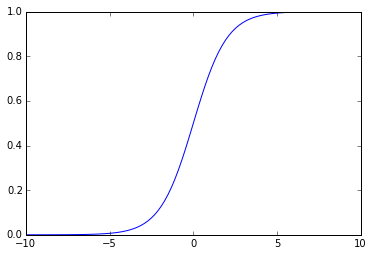

In [38]:
# inputs and outputs are defined on the next subslide. How would you define them?
plot(inputs, outputs)

In [37]:
# what should be the type of x?
def sigm(x):
    return (1.0 / (1.0 + np.exp(-x)) )

inputs = np.linspace(-10, 10, 100)
outputs = sigm(inputs)